## Final Project Submission

Please fill out:
* Student name: Thomas Brown
* Student pace: Full Time
* Scheduled project review date/time: tbd
* Instructor name: Abhineet Kulkarni
* Blog post URL: tbd


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Importing Data:

Let's import the csv file into a Pandas dataframe  and look at the first few rows as well as the basic meta-data.

In [2]:
df = pd.read_csv('kc_house_data.csv')
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

## Exploring Data:

### Columns:

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Here's a list of the columns in the dataframe:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Data Cleaning:

Right off the bat, we see that the following columns will need to be cleaned:
- __Waterfront__
- __View__
- __Year Renovated__

In [6]:
# Shows number of null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Waterfront: (done)

In [7]:
display(df['waterfront'].unique())
nulls1 = df['waterfront'].isna().sum()
print (f"{nulls1} null values in 'Waterfront'")
# Let's replace NaNs with 0s.  No further cleaning needed, this makes it a perfect dummy variable. 
# Given there are over 2,000 null values, I think it's safe to say these are meant to be 0s (not waterfront).

array([nan,  0.,  1.])

2376 null values in 'Waterfront'


In [8]:
# Replacing the nulls with 0s. 
df['waterfront'].fillna(0, inplace = True)
# Verifying that it worked
df['waterfront'].unique()

array([0., 1.])

### View: (done)

In [9]:
# Identifying the issue. . . (If code has already been run, null won't appear)
display(df['view'].unique())
nulls2 = df['view'].isna().sum()
print (f"{nulls2} null values in 'View'")
# Only 63 null values to deal with.  
# Null values here should likely just be replaced with 0 as well

array([ 0., nan,  3.,  4.,  2.,  1.])

63 null values in 'View'


In [10]:
# Let's start by replacing the nulls with 0.
df['view'].fillna(0, inplace = True)

In [11]:
# Just to be safe, I'm also making a new column, just to see whether or not a house has been viewed at all.
df['has_view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

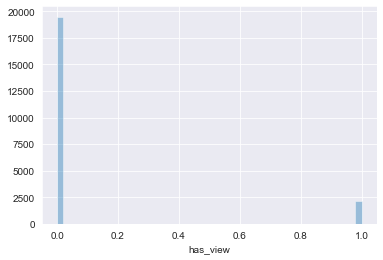

In [12]:
# It's strange that so many houses have 0 views. . . 
sns.distplot(df.has_view, kde = False)

### Year Renovated: (done)

Here, we have 3,842 values to replace. Given we have a 0 value, I think it's safe to replace the nulls with 0s. These represent houses that have not been renovated.

In [13]:
display(df['yr_renovated'].unique())
nulls3 = df['yr_renovated'].isna().sum()
print (f"{nulls3} null values in 'Year Renovated'")

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

3842 null values in 'Year Renovated'


In [14]:
df.yr_renovated.value_counts()
# Vast majority of houses have not seen renovations.

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

__We have a couple things to do here:__
- We need to replace the null values with 0s.  I think it's safe to assume that nulls, have not been renovated.
    - If it were a more significant portion of the total houses listed (~22k) I would likely use a more <br>
    elegant solution such replacing nulls with year built + average time from build to remodel.
    - For now, though, I'm assuming these houses have not been remodeled.
- Second, I don't want to lose the year renovated, but I also need a dummy variable for is renovated or not. <br>
As such, I'll start with making a new column, "has_been_renovated" where 0 is "no renovation" and 1 is "has been renovated"

In [15]:
# Let's start by tackling those nulls and then making a dummy variable:
df['yr_renovated'].fillna(0, inplace = True)
df['has_ren'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_view,has_ren
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1


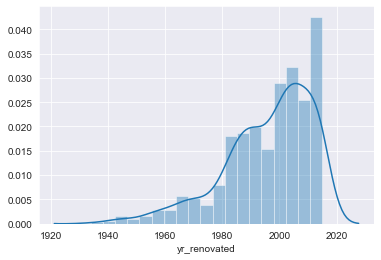

In [16]:
# Histogram of renovation for homes that have seen a renovation.
dftest = df[df['yr_renovated'] > 1]
sns.distplot(dftest.yr_renovated);

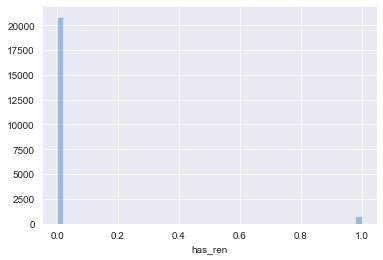

In [17]:
# Histogram showing proportion of homes that have been renovated.
sns.distplot(df.has_ren, kde = False);

In [83]:
# Only 744 renovations overall
df.has_ren.value_counts()

0    20853
1      744
Name: has_ren, dtype: int64

### SquareFeet Basement: (done)

If you look closely, you'll see a value listed as '?' listed below.  We'll need to replace those with 0s!
We'll also want to convert this to an int value when complete.
<br>We'll want a dummy variable here as well to deal with the large majority of 0s in the distribution.

In [19]:
# Here, we're replacing the '?' with a 0, then converting all values to int
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x == '?' else x)
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [20]:
# Creating a dummy variable to deal with the 0 biased basement issue
df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_view,has_ren,has_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1,1


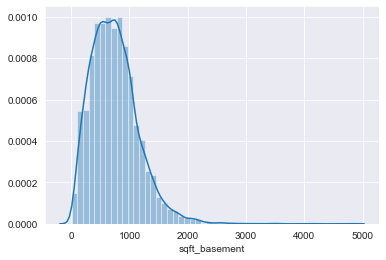

In [24]:
# Histogram of basement square feet for homes with basements.
dftest2 = df[df['sqft_basement'] > 1]
sns.distplot(dftest2.sqft_basement);

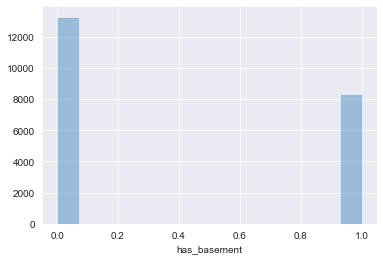

In [25]:
# Dummy variable below.  Now we can simply see if having a basement adds value.
sns.distplot(df.has_basement, kde = False);

### Grade: (done)

In [26]:
df['grade'].unique()
# Strange, it appears to be a scale from 3 to 13.  By subracting 3 from all, we can normalize the scale.

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [27]:
# 0 through 10.  Much better.
df['grade'] = df['grade'].map(lambda x: x - 3)
df['grade'].unique()

array([ 4,  3,  5,  8,  6,  2,  7,  9,  1,  0, 10])

### Date: (done)

Here, I simply changed the format so it can be read more easily later on.

In [28]:
df['date'] = pd.to_datetime(df['date'])

# Exploratory Data Analysis:

## Q1: 

Idea: Map of KC with heat over size of house relative to price. . .

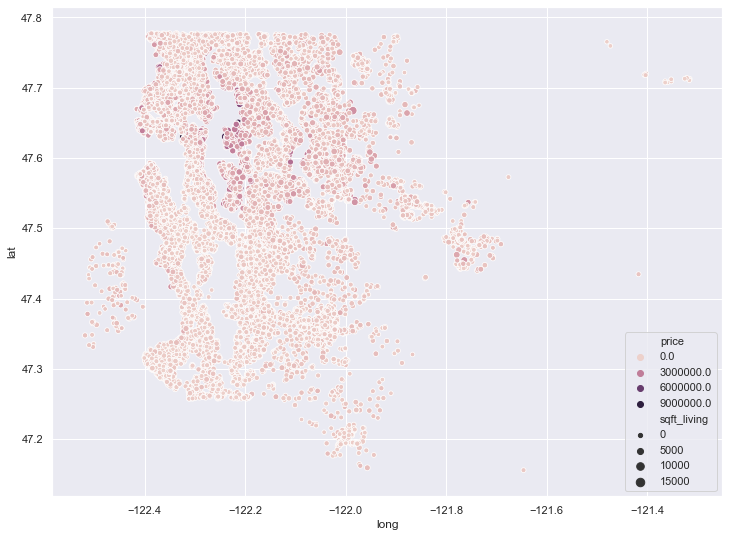

In [30]:
ax = sns.scatterplot(data = df, x = 'long',y = 'lat', hue = 'price', 
                     size = 'sqft_living')
sns.set(rc={'figure.figsize':(12,9)})
# Need to figure out the color min/max.  Also would be awesome to set this over an actual map.

### Using Folium (NOT done):

In [57]:
import folium
kc_coord = (47.6062, -122.335167)
max_records = 300 # Keeps it running quickly for now
# Creating an empty map
map = folium.Map(location = kc_coord, zoom_start = 11, tiles='Cartodb Positron')

# Adding markers:


# NOT WORKING FOR NOW
#for each in df[0:max_records].iterrows():
#    folium.map.Marker(location = [each[1]['lat'],each[1]['long']], clustered_marker = True)
  
display(map)

## Q2:

Idea: Best time to sell by area.  Split Seattle into grouped zips.

## Q3:

Idea: 

# Feature Engineering:

## Multicollinearity:

Multicollinearity is an issue that can lead to a broken regression result when two explanatory variables are too highly correlated for the model to tell which is the driving in terms of the result.

In [77]:
# Checking to see if any potential explanitory variables are highly correlated.
# Anything over .75 will be addressed/removed.
# This chart is a bit unwieldy, but we will look at a simpler version below. 
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_view,has_ren,has_basement
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


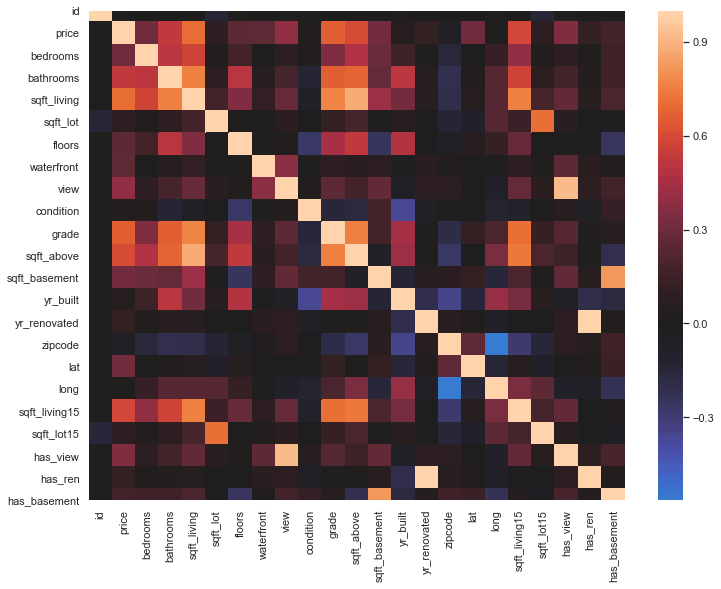

In [78]:
# Heatmap for quick visualization.
sns.heatmap(df.corr(), center=0);

The above chart is a bit messy. We're just searching for values correlated more strongly than .75. Let's simplify it by using a new color scheme, where the color only becomes brighter after a correlation stronger than .75.

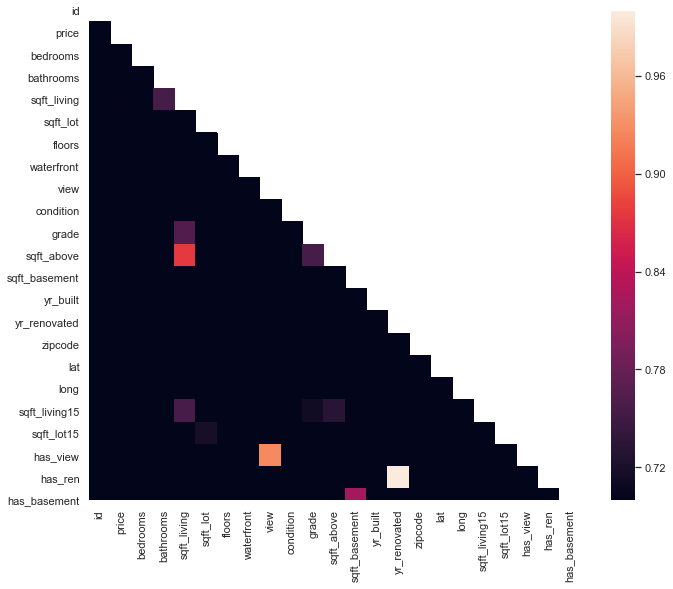

In [79]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), vmin=0.7, mask = mask);

Much better! From the above chart, we see that we should take the following actions:
- Only use the one hot encoded variables, not the original values they're derived from
    - For example, use "has_view" instead of "view"
- Use sqft_living instead of sqft_living15 or sqft_above. These are all highly correlated, but sqft_living is the most basic version of all these variables.

## Categorical vs. Continuous:

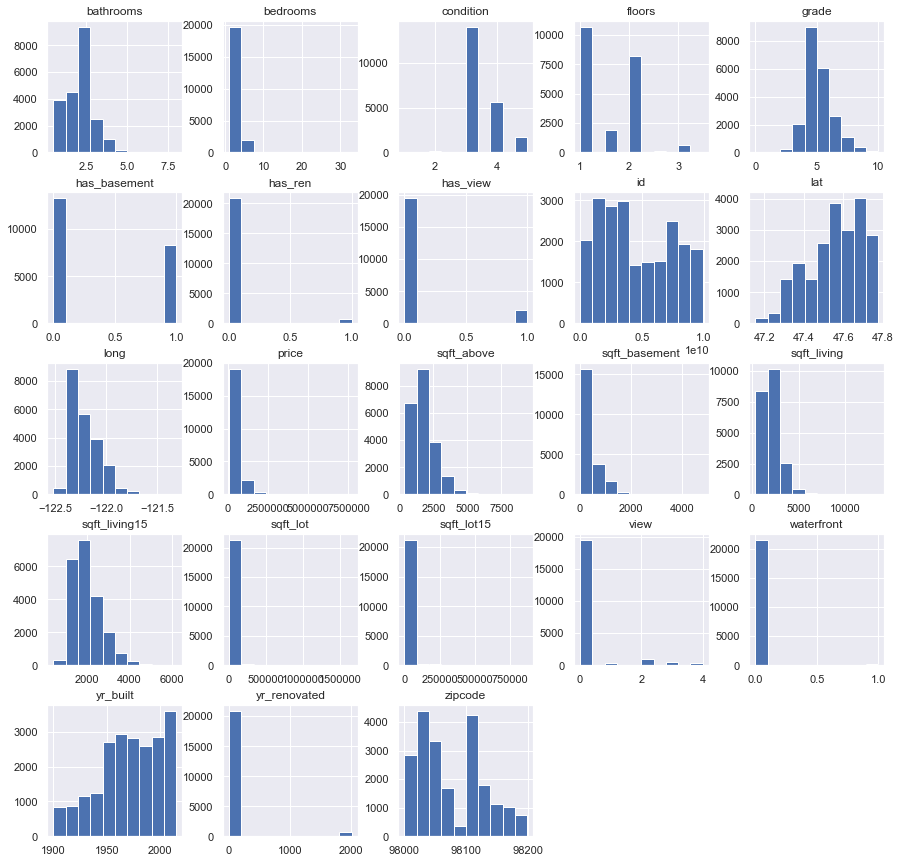

In [58]:
# Histogram to explore normality.  This is a basic eyeball test.
# Many of the values appear skewed or zero biased.
df.hist(figsize=(15,15));

In [ ]:
'''
EXAMPLE CODE FROM LESSON:
continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']
'''

### Categorical:

These categorical values I'll be using have already been one hot encoded.

In [59]:
cat = ['has_basement', 'has_view', 'has_ren', 'waterfront']
df_cat = df[cat]

#### One Hot Encoding:

### Continuous:

These may need to be log transformed for normality.

In [80]:
con = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 
       'sqft_living', 'yr_built']
df_con = df[con]

#### Log and Other Transformations:

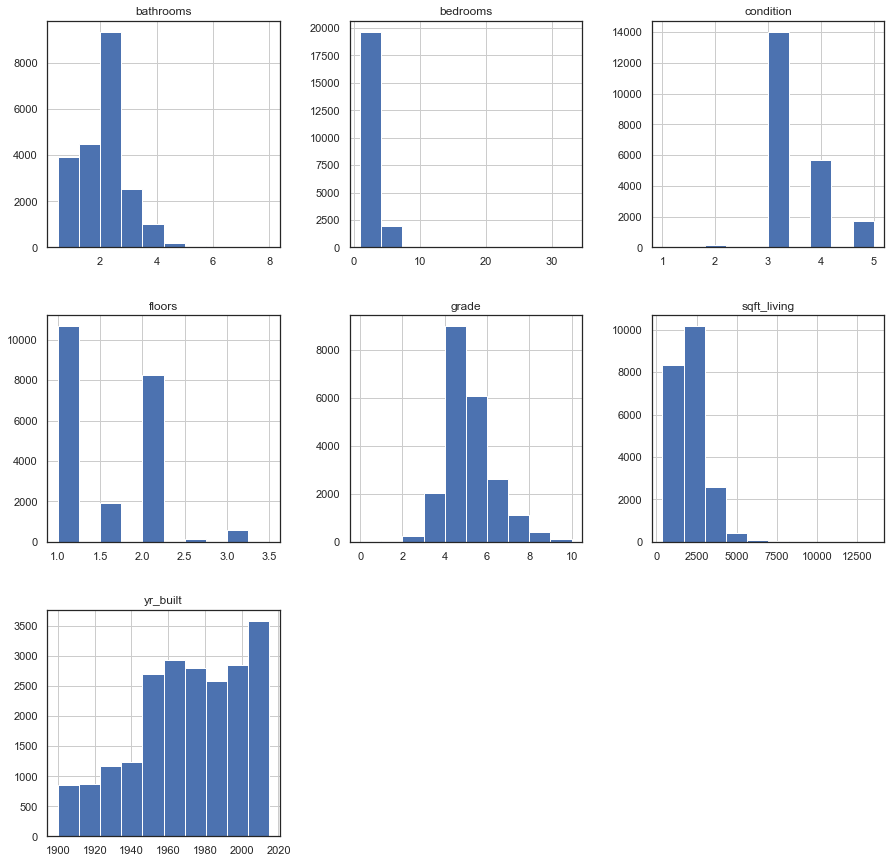

In [81]:
# Histogram to explore normality.  This is a basic eyeball test.
# Many of the values appear skewed or zero biased.
df_con.hist(figsize=(15,15));

In [82]:
# Log Transform
log_names = [f'{column}_log' for column in df_con.columns]

df_log = np.log(df_con)
df_log.columns = log_names

# Normalize

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

display(df_log.head(2))
display(df_log_norm.head(2))

,bathrooms_log,bedrooms_log,condition_log,floors_log,grade_log,sqft_living_log,yr_built_log
0,0.00000,1.098612,1.098612,0.000000,1.386294,7.073270,7.578145
1,0.81093,1.098612,1.098612,0.693147,1.386294,7.851661,7.576097


,bathrooms_log,bedrooms_log,condition_log,floors_log,grade_log,sqft_living_log,yr_built_log
0,-1.726509,-0.279718,-0.61336,-0.960852,NaN,-1.125556,-0.537409
1,0.339653,-0.279718,-0.61336,1.006831,NaN,0.709446,-0.674325


Log Transformations are a way of inducing normality from an otherwise not normally distributed set of data.

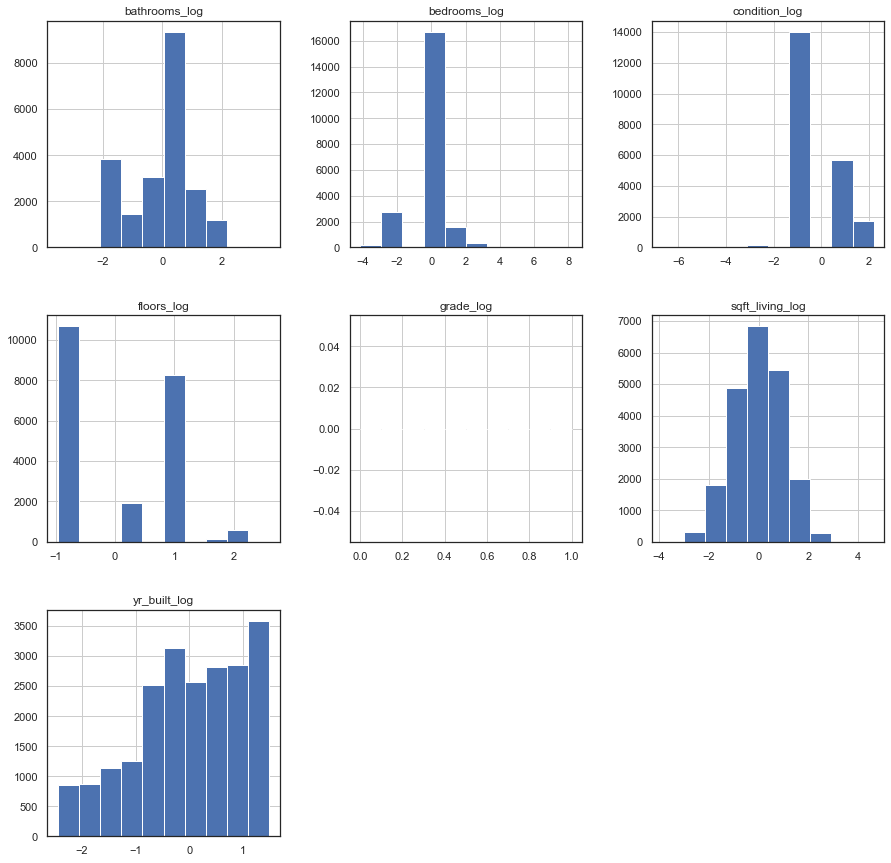

In [83]:
df_log_norm.hist(figsize=(15,15));

In [84]:
baseline_df = pd.concat([df_cat, df_con], axis=1)
feat_eng_df = pd.concat([df_log_norm, df_con], axis=1)
blX = baseline_df
X = feat_eng_df
y = df['price']

# Train/Test Split:

In [ ]:
# Probably don't need to k fold here.  Just do an 80/20 split of train and test
# Then save the new data sets
# Look up lesson on regression model validation.  

In [ ]:
'''
EXAMPLE K FOLD CODE:

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

MAYBE TRY WITH K = 10 OR 20 AS WELL.  NEED TO KNOW WHICH IS BETTER AND WHY
'''

## 80/20 Split for Simple Linear Model:

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(blX, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


# Regression Models:

Importing Libraries:

In [73]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')

## Simple Linear Model:

Here, we'll start with a relatively simple model to explore the data and see which variables are the most significant with a regression.

It's important to have a simple model with few transformations or polynomial features in order to have a baseline to compare other models against.

### Linear Model 1:

In [85]:
#Model 1
model = sm.OLS(df['price'],blX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          1.412e+04
Date:                Fri, 10 Jul 2020   Prob (F-statistic):                        0.00
Time:                        16:27:54   Log-Likelihood:                     -2.9711e+05
No. Observations:               21597   AIC:                                  5.942e+05
Df Residuals:                   21586   BIC:                                  5.943e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
has_basement  3.302e+04   3578.594      9.228      0.000     2.6e+04       4e+04
has_view       1.28e+05   5701.244     22.459      0.000    1.17e+05    1.39e+05
has_ren        1.46e+05   8577.818     17.018      0.000    1.29e+05    1.63e+05
waterfront    6.897e+05   1.97e+04     35.088      0.000    6.51e+05    7.28e+05
bathrooms    -1.407e+04   3481.069     -4.042      0.000   -2.09e+04   -7248.031
bedrooms     -3.004e+04   2133.561    -14.080      0.000   -3.42e+04   -2.59e+04
condition     6.277e+04   2446.967     25.650      0.000     5.8e+04    6.76e+04
floors        7985.8785   3772.821      2.117      0.034     590.870    1.54e+04
grade         1.116e+05   2239.457     49.839      0.000    1.07e+05    1.16e+05
sqft_living    181.2908      3.421     52.998      0.000     174.586     187.996
yr_built      -247.2127      6.693    -36.937      0.000    -260.331    -234.094
==============================================================================
Omnibus:                    15882.434   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           996682.178
Skew:                           2.951   Prob(JB):                         0.00
Kurtosis:                      35.753   Cond. No.                     3.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
#Model 1
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', np.sqrt(mse_train))
print('Test Mean Squarred Error:', np.sqrt(mse_test))

Train Mean Squarred Error: 217170.6890992202
Test Mean Squarred Error: 217276.38968552838


### Interpreting Results:

This is a great start!  RMSE is too large, but r2 is quite high.  Additionally, there's only a $100 dollar difference between the root mean squared error of the train and test data!
<br>Let's now test the following:
- Do log transformed variables improve the r2?
- Would a polynomial regression help?
- Are there any interactions we can use?

### Model Validity:

Heteroscedasticity, QQ Plots and more:

## Multiple Regression with Transformations:

### Interpreting Results:

-

### Model Validity:

Heteroscedasticity, QQ Plots and more:

## Testing for Interactions:

In [ ]:
'''
regression = LinearRegression()

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals)

preprocessed = pd.concat([ames_cont, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice', axis=1)
y = preprocessed['SalePrice']

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline
'''

In [ ]:
'''
from itertools import combinations

# code to find top interactions by R^2 value here
interactions = []

feat_combinations = combinations(X.columns, 2)
data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])
'''

In [ ]:
'''
# Visualization code here
fig, ax = plt.subplots(figsize=(13, 10))

col = 'LotArea'

is_in = preprocessed.loc[preprocessed['Neighborhood_Edwards'] == 1, [col, 'SalePrice']]

linreg = LinearRegression()
linreg.fit(np.log(is_in[[col]]), np.log(is_in['SalePrice']))

preds = linreg.predict(np.log(is_in[[col]]))

ax.scatter(np.log(is_in[[col]]), np.log(is_in['SalePrice']), alpha=.3, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'In Edwards:   {linreg.coef_[0]:.2f}')

not_in = preprocessed.loc[preprocessed['Neighborhood_Edwards'] == 0, [col, 'SalePrice']]

linreg = LinearRegression()
linreg.fit(np.log(not_in[[col]]), np.log(not_in['SalePrice']))

preds = linreg.predict(np.log(not_in[[col]]))

ax.scatter(np.log(not_in[[col]]), np.log(not_in['SalePrice']), alpha=.1, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'Outside of Edwards:   {linreg.coef_[0]:.2f}')

ax.legend()
'''

In [ ]:
#Building the final model
'''
# code here
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final['Neighborhood_Edwards*LotArea'] = final['Neighborhood_Edwards'] * final['LotArea']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model
'''

In [ ]:
'''
import statsmodels.api as sm
df_inter_sm = sm.add_constant(final)
model = sm.OLS(y,final)
results = model.fit()

results.summary()
'''

### Interpreting Results:

-

### Model Validity:

## Polynomial Regression:

Can we get better results with a polynomial model?  Let's try some of our top explanatory variables squared. . .

### Scatter Plots:

Here, we'll run some scatter plots to find applicable candidates for polynomial regression.  I'm looking for non-linear relationships between independent variables (x) and the dependent variable (y).  <br> 
If I find any, we'll create a new variable x^2 or x^3, depending on which works better.

DO NOT RUN - FROM LAB

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
y = df['y']
X = df.drop(columns='y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='green', s=50, marker='.', label='plot points')

# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Transform the test data into polynomial features
    X_poly_test = poly.transform(X_test)
    
    # Get predicted values for transformed polynomial test data  
    y_pred = reg_poly.predict(X_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    # Transform the full data
    X_poly = poly.transform(X)
    
    # Now, we want to see what the model predicts for the entire data  
    y_poly = reg_poly.predict(X_poly)
    
    # Create plot of predicted values
    plt.plot(X, y_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    plt.legend(loc='lower left')

### Interpreting Results:

-

### Model Validity:

Heteroscedasticity, QQ Plots and more:

## Last Adjustments:

Seeing if we can squeeze out any sort of better model.

In [2]:
# Stepwise functions or recursion


# Final Model:

Additional charts and such. . . 

# Further Work To Do:

Zero in on houses that have been renovated.  How long until sale typically?  Do they tend to sell for higher values than similar non renovated homes?  etc. . . 

Idea: 

Idea: 

# Conclusion:

Action items:
- one
- two
- three

Thanks for reading!

-Thomas Brown